<a href="https://colab.research.google.com/github/mrunalkavade/Prediction-of-Student-Depression-Using-Machine-Learning-K-Means-Clustering-/blob/main/Student_Depression_Prediction_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Model Trained Successfully!
Accuracy: 0.8440860215053764
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580



/tmp/ipython-input-4-2476264862.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Depression", data=df, palette="Set2")
/tmp/ipython-input-4-2476264862.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


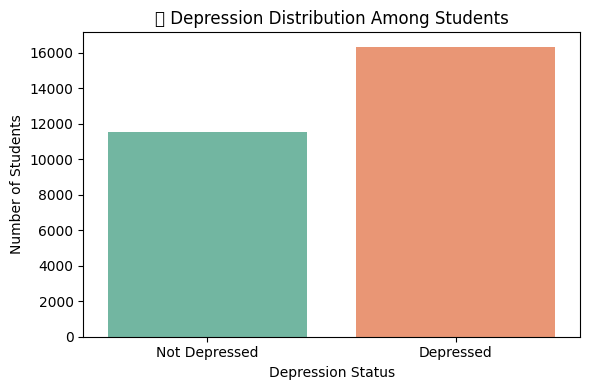

/tmp/ipython-input-4-2476264862.py:85: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


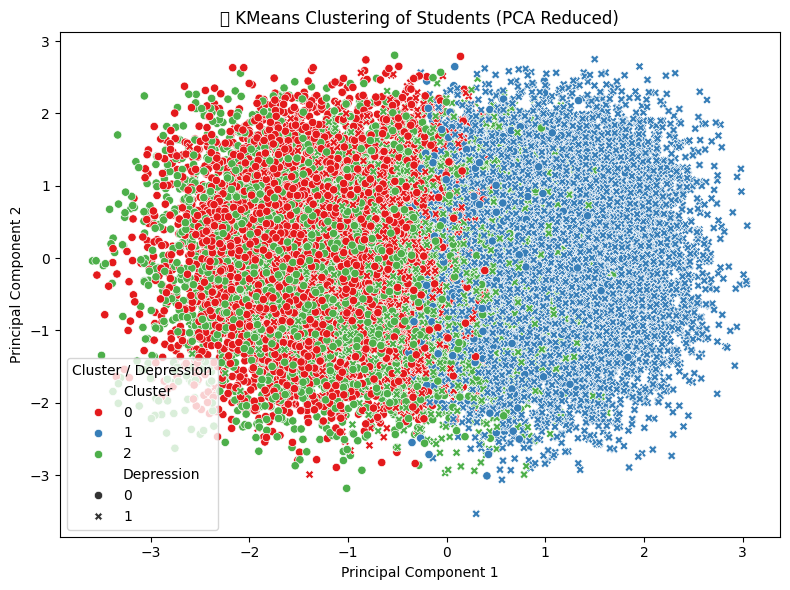


📊 Cluster Summary:
            Gender        Age  Academic Pressure  Financial Stress      CGPA  \
Cluster                                                                       
0        0.561766  27.437300           2.352855          2.414888  7.608551   
1        0.566532  24.735400           3.782121          3.726926  7.646883   
2        0.535944  26.113652           2.801315          2.831028  7.721666   

         Study Satisfaction  Family History of Mental Illness  Sleep Duration  \
Cluster                                                                         
0                  3.215848                          0.468650        1.502268   
1                  2.685701                          0.514314        1.459119   
2                  3.128167                          0.445160        1.614953   

         Dietary Habits  Have you ever had suicidal thoughts ?  \
Cluster                                                          
0              1.088447                      

In [4]:
# === 0. Import Libraries ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# === 1. Load & Clean Dataset ===
df = pd.read_csv("/content/Student Depression Dataset.csv")
df.drop(columns=["id", "City", "Profession", "Degree"], inplace=True)
df.dropna(inplace=True)

# Define categorical columns
categorical_cols = [
    "Gender",
    "Sleep Duration",
    "Dietary Habits",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness"
]

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str).str.lower())
    label_encoders[col] = le

# === 2. Define Features and Target ===
target = "Depression"
features = df.columns[df.columns != target].tolist()

X = df[features]
y = df[target]

# === 3. Split and Scale ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. Train Logistic Regression Model ===
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# === 5. Evaluate ===
y_pred = model.predict(X_test_scaled)
print("\n✅ Model Trained Successfully!")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# === 6. Depression Distribution Countplot ===
plt.figure(figsize=(6, 4))
sns.countplot(x="Depression", data=df, palette="Set2")
plt.title("📊 Depression Distribution Among Students")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.xlabel("Depression Status")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# === 7. KMeans Clustering ===
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters
pca_df['Depression'] = y_train.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', style='Depression', palette='Set1', data=pca_df)
plt.title('🎯 KMeans Clustering of Students (PCA Reduced)')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster / Depression")
plt.tight_layout()
plt.show()

# Optional: Cluster Summary
X_with_clusters = X.copy()
X_with_clusters['Cluster'] = kmeans.predict(scaler.transform(X))
X_with_clusters['Depression'] = y.values
print("\n📊 Cluster Summary:\n", X_with_clusters.groupby('Cluster').mean())

# === 8. Predict from User Input ===
def get_user_input():
    print("\n📋 Enter the following details (case doesn't matter):")
    Gender = input("Gender (male/female): ").strip().lower()
    Age = int(input("Age: "))
    Academic_Pressure = int(input("Academic Pressure (0 to 5): "))
    Financial_Stress = int(input("Financial Stress (1 to 5): "))
    CGPA = float(input("CGPA (e.g., 7.5): "))
    Study_Satisfaction = int(input("Study Satisfaction (0 to 5): "))
    Family_History = input("Family History of Mental Illness (yes/no): ").strip().lower()
    Sleep_Duration = input("Sleep Duration (e.g., less than 5 hours, 5-6 hours, 7-8 hours): ").strip().lower()
    Dietary_Habits = input("Dietary Habits (healthy/moderate/unhealthy): ").strip().lower()
    Suicidal_Thoughts = input("Have you ever had suicidal thoughts? (yes/no): ").strip().lower()
    Work_Study_Hours = int(input("Work/Study Hours per day (0 to 12): "))

    return pd.DataFrame([{
        "Gender": Gender,
        "Age": Age,
        "Academic Pressure": Academic_Pressure,
        "Financial Stress": Financial_Stress,
        "CGPA": CGPA,
        "Study Satisfaction": Study_Satisfaction,
        "Family History of Mental Illness": Family_History,
        "Sleep Duration": Sleep_Duration,
        "Dietary Habits": Dietary_Habits,
        "Have you ever had suicidal thoughts ?": Suicidal_Thoughts,
        "Work/Study Hours": Work_Study_Hours
    }])

# === 9. Predict Based on Input ===
user_df = get_user_input()

# Encode user input
for col in categorical_cols:
    user_df[col] = user_df[col].str.lower()
    encoder = label_encoders[col]
    val = user_df[col].iloc[0]
    if val not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, val)
    user_df[col] = encoder.transform(user_df[col])

user_df = user_df[features]
user_scaled = scaler.transform(user_df)

# Predict Depression
prediction = model.predict(user_scaled)[0]
probability = model.predict_proba(user_scaled)[0][1]

# Predict Cluster
user_cluster = kmeans.predict(user_scaled)[0]

# === 10. Show Final Results ===
print("\n🎯 PREDICTION RESULT:")
if prediction == 1:
    print("⚠  The student is likely experiencing *depression*.")
else:
    print("✅  The student is likely *not* experiencing depression.")
print(f"🔎 Confidence: {probability:.2%} chance of depression.")